In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "LT.BO"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 1, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-5-2532203904.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,LT.BO,LT.BO,LT.BO,LT.BO,LT.BO
Date,,,,,
2000-01-03,35.849854,35.849854,34.007649,34.007649,4531337
2000-01-04,37.262112,37.617419,35.828955,36.533591,9684761
2000-01-05,34.282337,36.870979,34.282337,36.870979,12285095
2000-01-06,34.455505,36.426100,34.282333,34.282333,9480095
2000-01-07,32.484917,34.975028,32.365487,34.336080,10527317


In [ ]:
df.shape

(6129, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6129 entries, 2000-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, LT.BO)   6129 non-null   float64
 1   (High, LT.BO)    6129 non-null   float64
 2   (Low, LT.BO)     6129 non-null   float64
 3   (Open, LT.BO)    6129 non-null   float64
 4   (Volume, LT.BO)  6129 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 287.3 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,LT.BO,0
High,LT.BO,0
Low,LT.BO,0
Open,LT.BO,0
Volume,LT.BO,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,LT.BO,LT.BO,LT.BO,LT.BO,LT.BO
count,6129.000000,6129.000000,6129.000000,6129.000000,6.129000e+03
mean,801.544853,811.509894,792.424070,802.370660,1.179802e+06
std,830.756285,838.940318,822.750086,831.265417,2.403604e+06
min,8.846766,8.936339,8.434733,8.524305,0.000000e+00
25%,160.511139,164.436882,158.045303,160.514756,1.661040e+05
50%,579.125305,587.361978,572.728255,580.274357,4.177490e+05
75%,1096.180664,1109.863653,1086.848994,1097.477047,1.186102e+06
max,3911.356689,3926.416269,3866.425177,3923.394376,3.594438e+07


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',      ''),
            ( 'Close', 'LT.BO'),
            (  'High', 'LT.BO'),
            (   'Low', 'LT.BO'),
            (  'Open', 'LT.BO'),
            ('Volume', 'LT.BO')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("LTBO.csv")

In [ ]:
data01 = pd.read_csv("LTBO.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,LT.BO,LT.BO,LT.BO,LT.BO,LT.BO
1,0,2000-01-03,35.849853515625,35.849853515625,34.00764881991251,34.00764881991251,4531337
2,1,2000-01-04,37.26211166381836,37.6174189414598,35.82895478453261,36.53359110441032,9684761
3,2,2000-01-05,34.2823371887207,36.870978621774796,34.2823371887207,36.870978621774796,12285095
4,3,2000-01-06,34.45550537109375,36.426100396511764,34.2823333847278,34.2823333847278,9480095


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df = df.drop(['Date'], axis = 1)

/tmp/ipython-input-21-1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,56.587513,61.593765,46.771885,50.512512,855215656
1,53.690639,58.500015,53.353138,58.500015,126671715
2,57.346889,57.853138,50.821888,53.718761,116725709
3,57.881264,59.062515,57.375015,58.837513,67931378
4,64.350014,67.500015,57.375015,67.500015,106320954


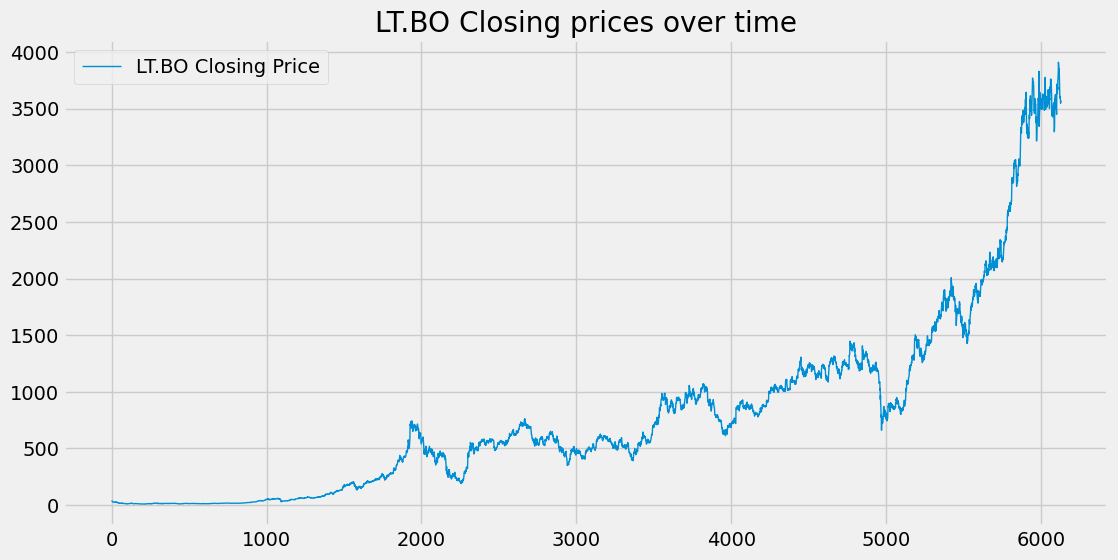

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

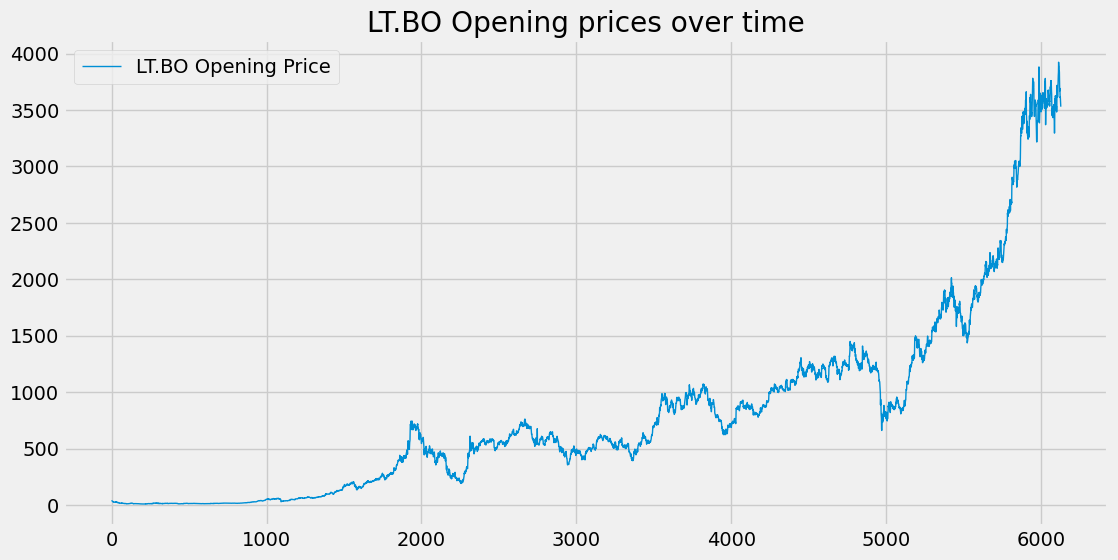

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

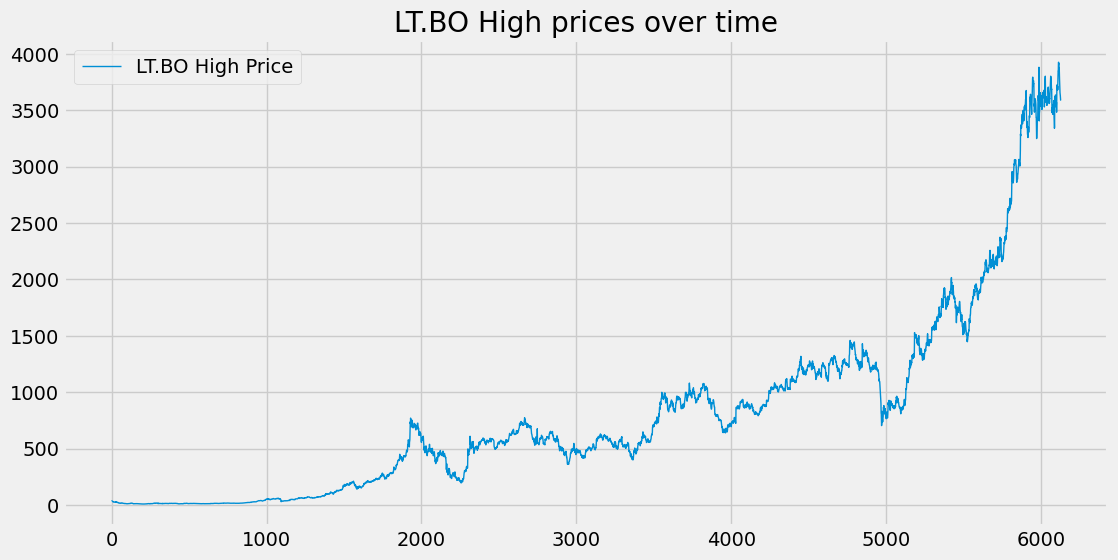

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

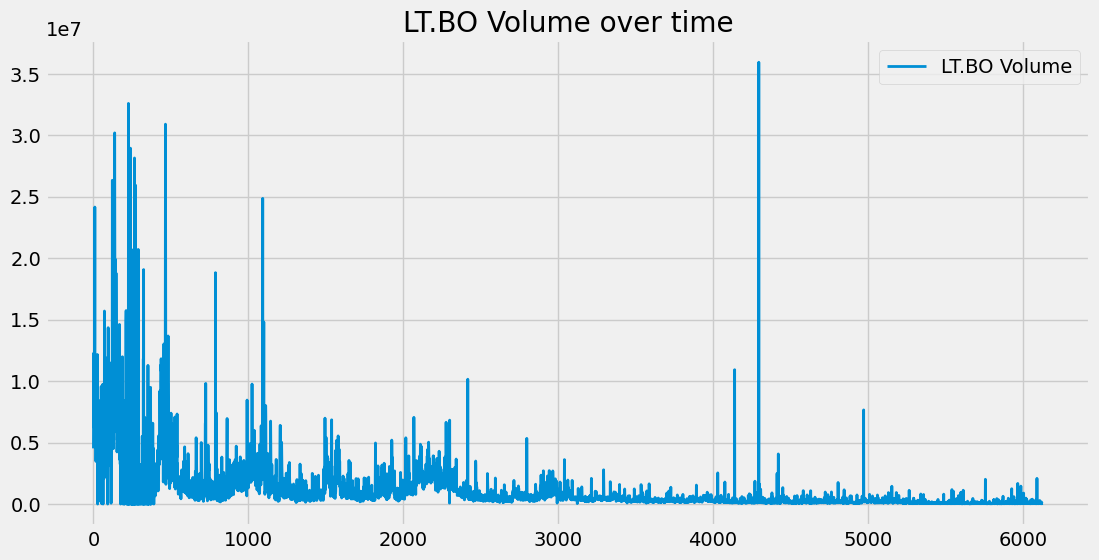

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [ ]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100 = df.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,LT.BO
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6124,3607.200984
6125,3605.748022
6126,3603.996343
6127,3601.715593


In [ ]:
ma200 = df.Close.rolling(200).mean()

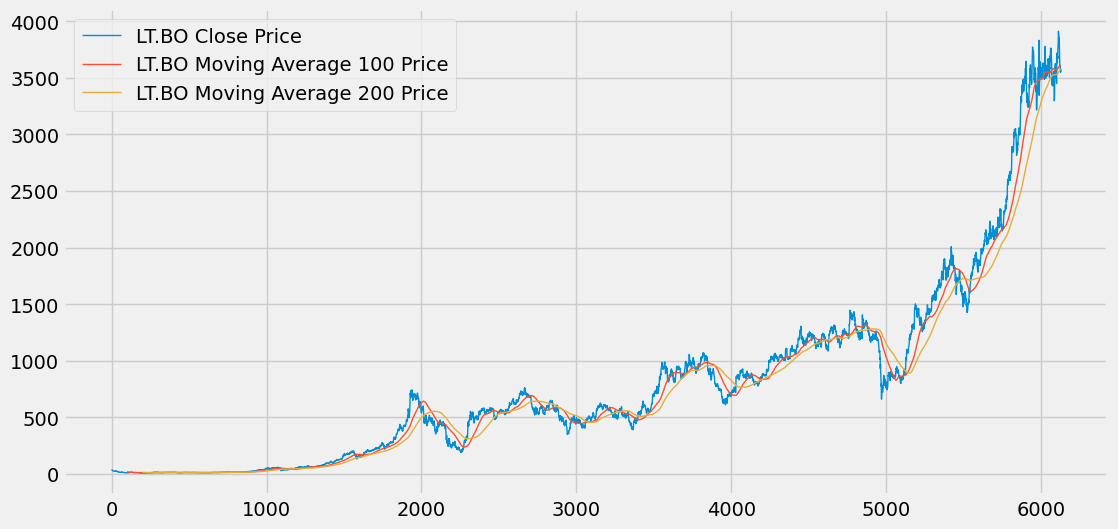

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

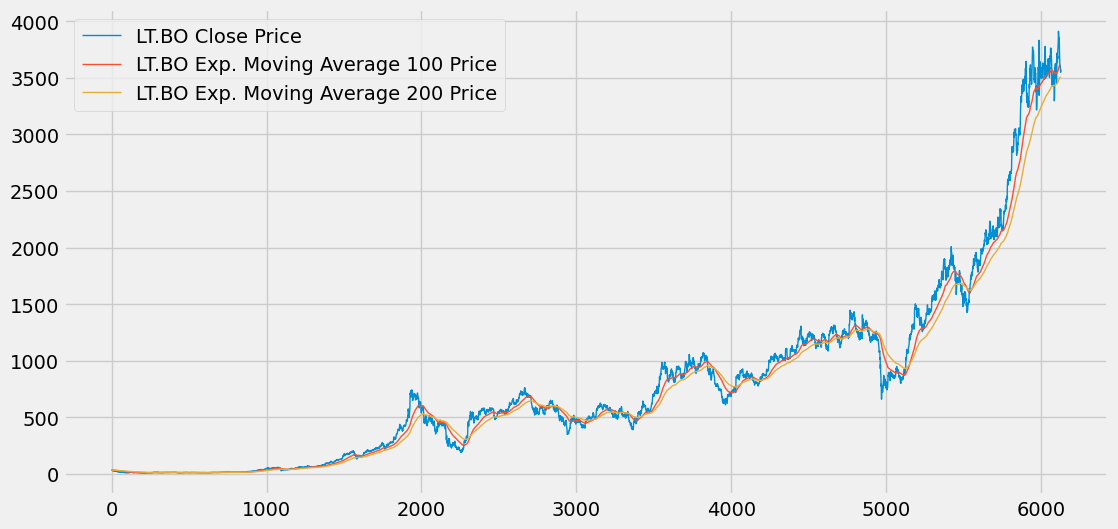

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training.shape

(4290, 1)

In [ ]:
data_testing.shape

(1839, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.02545847],
       [0.02678994],
       [0.02398062],
       ...,
       [0.98031586],
       [0.98154166],
       [0.9588657 ]])

In [ ]:
data_training_array.shape[0]

4290

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(4190, 100, 1)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - loss: 0.0742
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0083
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0081
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0061
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0062
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0057
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0057
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0047
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0043
Epoch 10/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0045
Epoch 11/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0043
Epoch 12/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0042
Epoch 13/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0036
Epoch 14/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0038
Epoch 15/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [ ]:
final_df.head()

Ticker,LT.BO
0,852.504211
1,854.720276
2,857.320496
3,854.218018
4,835.928040


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1839, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


In [ ]:
y_predicted.shape

(1839, 1)

In [ ]:
scaler.scale_

array([0.00030767])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

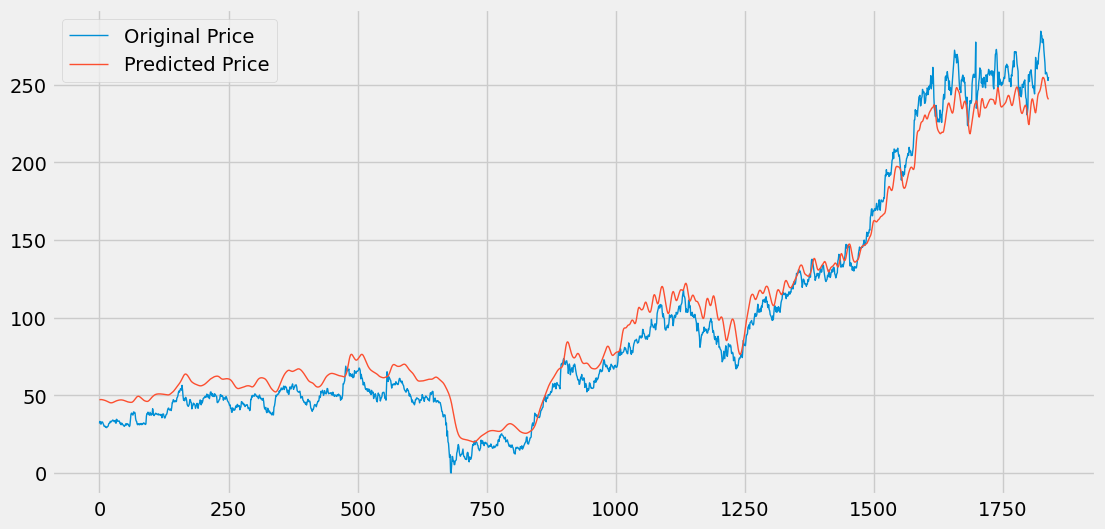

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')